In [1]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
from keras.datasets import mnist, fashion_mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# predicting the test data
prediction = autoencoder.predict(x_test)

Using TensorFlow backend.


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 70us/step - loss: 0.5312 - val_loss: 0.4669
Epoch 2/5
60000/60000 [==============================] - 3s 56us/step - loss: 0.4287 - val_loss: 0.4071
Epoch 3/5
60000/60000 [==============================] - 3s 57us/step - loss: 0.3955 - val_loss: 0.3876
Epoch 4/5
60000/60000 [==============================] - 3s 55us/step - loss: 0.3778 - val_loss: 0.3717
Epoch 5/5
60000/60000 [==============================] - 3s 47us/step - loss: 0.3633 - val_loss: 0.3588


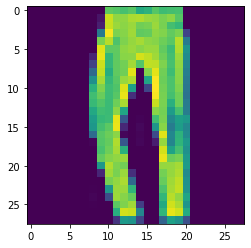

In [3]:
# visualizing the input image
from matplotlib import pyplot as mplt
mplt.imshow(x_test[5].reshape(28, 28))
mplt.show()

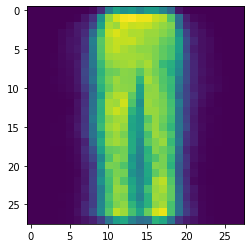

In [4]:
# visualizing the reconstructed Image
from matplotlib import pyplot as mplt
mplt.imshow(prediction[5].reshape(28, 28))
mplt.show()

1. Add one more hidden layer to autoencoder

In [6]:
# this is our input placeholder
input_img = Input(shape=(784,))

# adding one more hidden layer to encoding
enc_hidden_layer = Dense(512, activation='relu')(input_img)
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(enc_hidden_layer)

# adding hidden layer to decoding
dec_hidden_layer = Dense(512, activation='relu')(encoded)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(dec_hidden_layer)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

from keras.datasets import mnist, fashion_mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# preparing train and test data by converting into float & Scaling Data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [7]:
# training the model
autoencoder.fit(x_train, x_train,  # fitting the model
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# predicting the test data
prediction = autoencoder.predict(x_test)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 14s 237us/step - loss: 0.4759 - accuracy: 0.4661 - val_loss: 0.3908 - val_accuracy: 0.4904
Epoch 2/5
60000/60000 [==============================] - 13s 225us/step - loss: 0.3765 - accuracy: 0.4933 - val_loss: 0.3640 - val_accuracy: 0.4960
Epoch 3/5
60000/60000 [==============================] - 12s 198us/step - loss: 0.3563 - accuracy: 0.4976 - val_loss: 0.3474 - val_accuracy: 0.4959
Epoch 4/5
60000/60000 [==============================] - 12s 207us/step - loss: 0.3413 - accuracy: 0.5003 - val_loss: 0.3373 - val_accuracy: 0.5021
Epoch 5/5
60000/60000 [==============================] - 15s 246us/step - loss: 0.3304 - accuracy: 0.5021 - val_loss: 0.3363 - val_accuracy: 0.4962


# 2. Do the prediction on the test data and then visualize the reconstructed version of that test data.
# Also, visualize the same test data before reconstruction using Matplotlib

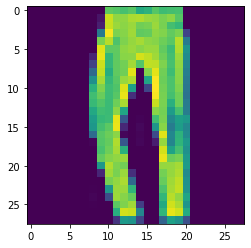

In [17]:
# visualizing the input Image
from matplotlib import pyplot as mplt
mplt.imshow(x_test[5].reshape(28, 28))
mplt.show()

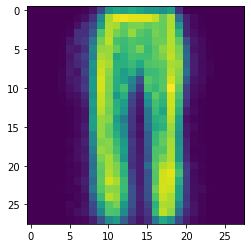

In [18]:
# visualizing one of the reconstructed version of the test data
from matplotlib import pyplot as mplt
mplt.imshow(prediction[5].reshape(28, 28))
mplt.show()

# 3. Repeat the question 2 on the denoisening autoencoder

In [9]:
# introducing noise to the train and test data
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# training the model
history = autoencoder.fit(x_train_noisy, x_train,  # fitting the model
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 15s 255us/step - loss: 0.3298 - accuracy: 0.5021 - val_loss: 0.3157 - val_accuracy: 0.0000e+00
Epoch 2/10
60000/60000 [==============================] - 15s 249us/step - loss: 0.3256 - accuracy: 0.5027 - val_loss: 0.3096 - val_accuracy: 0.0000e+00
Epoch 3/10
60000/60000 [==============================] - 14s 239us/step - loss: 0.3231 - accuracy: 0.5030 - val_loss: 0.3068 - val_accuracy: 0.0000e+00
Epoch 4/10
60000/60000 [==============================] - 15s 248us/step - loss: 0.3212 - accuracy: 0.5033 - val_loss: 0.3060 - val_accuracy: 0.0000e+00
Epoch 5/10
60000/60000 [==============================] - 14s 238us/step - loss: 0.3197 - accuracy: 0.5035 - val_loss: 0.3018 - val_accuracy: 0.0000e+00
Epoch 6/10
60000/60000 [==============================] - 12s 206us/step - loss: 0.3184 - accuracy: 0.5037 - val_loss: 0.3000 - val_accuracy: 0.0000e+00
Epoch 7/10
60000/60000 [========

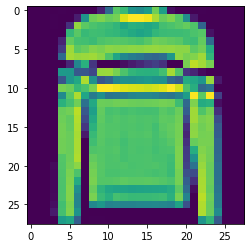

In [10]:
# plot before applying Noise to data
from matplotlib import pyplot as mplt
mplt.imshow(x_train[5].reshape(28,28))
mplt.show()

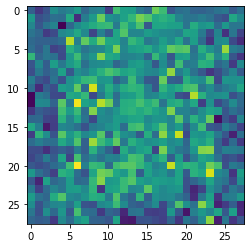

In [11]:
# plot after Applying Noise to data
from matplotlib import pyplot as mplt
mplt.imshow(x_train_noisy[5].reshape(28,28))
mplt.show()

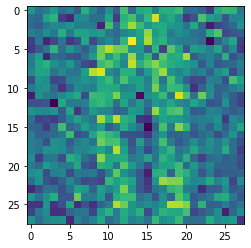

In [12]:
# predicting the test data
prediction = autoencoder.predict(x_test_noisy) #prediction

# predicted input image after adding Noise
from matplotlib import pyplot as mplt
mplt.imshow(x_test_noisy[5].reshape(28,28))
mplt.show()

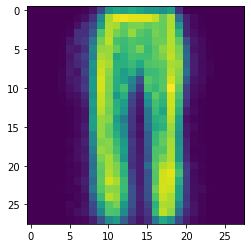

In [13]:
# visualizing one of the reconstructed version of the test data of denoisening autoencoder
from matplotlib import pyplot as mplt
mplt.imshow(prediction[5].reshape(28,28))
mplt.show()

# 4. plot loss and accuracy using the history object

In [14]:
autoencoder.metrics_names

['loss', 'accuracy']

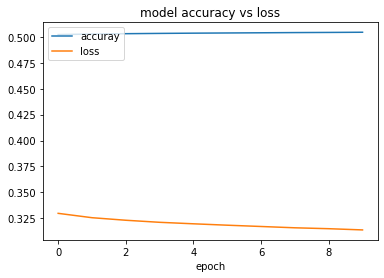

In [15]:
import matplotlib.pyplot as mplt
mplt.plot(history.history['accuracy'])
mplt.plot(history.history['loss'])
mplt.title('model accuracy vs loss')
mplt.xlabel('epoch')
mplt.legend(['accuray','loss'], loc='upper left')
mplt.show()

# Bonus question
# 1. Visualize the compressed version of the input data in the middle layer

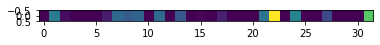

In [16]:
# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

encoder = Model(input_img, encoded)
encoder.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['accuracy'])

from keras.datasets import mnist, fashion_mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# preparing train and test data by converting into float & Scaling Data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

encoded_img = encoder.predict(x_test[[2],:])

from matplotlib import pyplot as mplt
mplt.imshow(encoded_img)
mplt.show() 